# Disk Scheduling Algorithms

---
**Authors:**  Jonh Alexis Buot, Vladymir Godornes Roman <br>
**Date:**     December 05, 2023 <br>
**Course:**   CS 3104 - Operating Systems <br>
**Activity:** Disk Scheduling Algorithms <br>

---

In [33]:
import re
import matplotlib.pyplot as plt

In [34]:
def fcfs(tracks, track_bounds):
    return tracks.copy()

def sstf(tracks, track_bounds):
    tracks_buffer = tracks.copy()
    sorted_tracks = [tracks_buffer.pop(0)]

    while len(tracks_buffer) > 0:
        min_sstf_track_idx = min((i for i in range(len(tracks_buffer))), key=lambda i : abs(tracks_buffer[i] - sorted_tracks[-1]))
        track = tracks_buffer.pop(min_sstf_track_idx)
        sorted_tracks.append(track)

    return sorted_tracks

def scan(tracks, track_bounds):
    higher_tracks = sorted(track for track in tracks if track >= tracks[0])
    lower_tracks = sorted((track for track in tracks[1:] if track < tracks[0]), reverse=True)

    if len(lower_tracks) > 0 and track_bounds[1] not in higher_tracks:
        higher_tracks.append(track_bounds[1])

    return higher_tracks + lower_tracks

def cscan(tracks, track_bounds):
    higher_tracks = sorted(track for track in tracks if track >= tracks[0])
    lower_tracks = sorted(track for track in tracks[1:] if track < tracks[0])

    if len(lower_tracks) > 0:
        if track_bounds[1] not in higher_tracks:
            higher_tracks.append(track_bounds[1])
        if track_bounds[0] not in lower_tracks:
            lower_tracks.insert(0, track_bounds[0])

    return higher_tracks + lower_tracks

def look(tracks, track_bounds):
    higher_tracks = sorted(track for track in tracks if track >= tracks[0])
    lower_tracks = sorted((track for track in tracks[1:] if track < tracks[0]), reverse=True)

    return higher_tracks + lower_tracks

def clook(tracks, track_bounds):
    higher_tracks = sorted(track for track in tracks if track >= tracks[0])
    lower_tracks = sorted(track for track in tracks[1:] if track < tracks[0])

    return higher_tracks + lower_tracks

def graph_it(tracks, track_bounds, title = "", print_calcs_to_console = False):
    time = list(range(len(tracks)))
    _, ax = plt.subplots()

    plt.plot(time, tracks, color="lightblue", linestyle="-", linewidth=2)
    plt.scatter(time, tracks, color="blue", marker="o", clip_on=False, zorder=2)
    
    for i, track in enumerate(tracks):
        ax.text(i, track + 7.5, track, color="blue", ha="center")
    
    plt.title(title)
    
    plt.xlabel("Time")
    plt.xticks(time)
    plt.xlim(0, time[-1])

    plt.ylabel("Track Number")
    y_ticks = [i for i in range(0, track_bounds[1], 20)]
    if track_bounds[1] not in y_ticks:
        y_ticks.append(track_bounds[1])
    plt.yticks(y_ticks)
    plt.ylim(track_bounds[0], track_bounds[1])
    
    seek_pairs = [(max(curr_track, next_track), min(curr_track, next_track)) for curr_track, next_track in zip(tracks[:-1], tracks[1:])]
    calculations = " + ".join(f"({curr} - {next})" for curr, next in seek_pairs)
    total_seek_time = sum(curr - next for curr, next in seek_pairs)

    if print_calcs_to_console:
        print(f"Total Seek Time = {calculations}")
        print(f"Total Seek Time = {total_seek_time}")
    else:
        plt.figtext(0.125, -0.05, f"Total Seek Time = {calculations}", fontsize = 10, ha="left", va="bottom")
        plt.figtext(0.125, -0.1, f"Total Seek Time = {total_seek_time}", fontsize = 10, ha="left", va="bottom")
    
    plt.grid(True)
    plt.show()

def input_bounded_num(prompt = "", min = 1, max = None):
    """ Get a number input from the user that satisfies a certain minimum and maximum. """
    result = None
    
    while result is None:
        try:
            result = int(input(prompt))
            if min > result or (max is not None and max < result):
                result = None
                raise ValueError()
        except KeyboardInterrupt:
            print("Keyboard Interrupt")
            exit(1)
        except:
            if max is None:
                print("The input should be a number that is at least equal to {}.".format(min))
            else:
                print("The input should be a number between {} and {}.".format(min, max))
   
    return result

def input_choice(prompt = "", choices = [], default = ""):
    """ Make a user select between a set of values. """
    result = None
    prompt_suffix = "(" + "/".join(choices) + (", default: " + default if default else "") + ")"
    prompt_text = prompt + " " + prompt_suffix + " "
    choices_lowered = [s.lower() for s in choices]

    while result is None:
        try:
            result = input(prompt_text).strip()
            if result == "":
                result = default
            elif result.lower() not in choices_lowered:
                result = None
                raise ValueError()
        except KeyboardInterrupt:
            print("Keyboard Interrupt")
            exit(1)
        except:
            print("Please input {} only.".format("(" + "/".join(choices) + ")"))
   
    return result

def prompt_user():    
    num_cylinders = input_bounded_num("Number of Cylinders: ")
    track_bounds = (0, num_cylinders - 1)

    has_starting_track = input_choice("Has starting track?", choices=['Y', 'N'], default='N')
    starting_track = None
    if has_starting_track == 'Y':
        starting_track = input_bounded_num("Starting Track: ", min=track_bounds[0], max=track_bounds[1])
    
    tracks = []
    while len(tracks) == 0:
        track_list = input("Tracks (separated by space): ")
        tracks = re.findall(r'[A-Za-z0-9]+', track_list)
        if len(tracks) == 0:
            tracks.clear()
            print("Track list must not be empty!")
            continue

        try:
            tracks = [int(track) for track in tracks]
        except:
            tracks.clear()
            print("Tracks must only contain numbers.")

        for track in tracks:
            if track > track_bounds[1] or track < track_bounds[0]:
                tracks.clear()
                print(f"Tracks must be within the bounds of the tracks present, which is between {track_bounds[0]} and {track_bounds[1]}.")

    if starting_track is not None:
        tracks.insert(0, starting_track)

    return tracks, track_bounds

print("Dependencies Loaded!")

Dependencies Loaded!


### Configurations

In [35]:
# Configurations
num_cylinders = 200
starting_track = 65
tracks = [117, 58, 112, 7, 101, 73, 105, 38, 88]

# Other Config leave as is
tracks.insert(0, starting_track)
track_bounds = (0, num_cylinders - 1)

print_calcs_to_console = False
# tracks, track_bounds = prompt_user() # Uncomment to manually configure

### Output

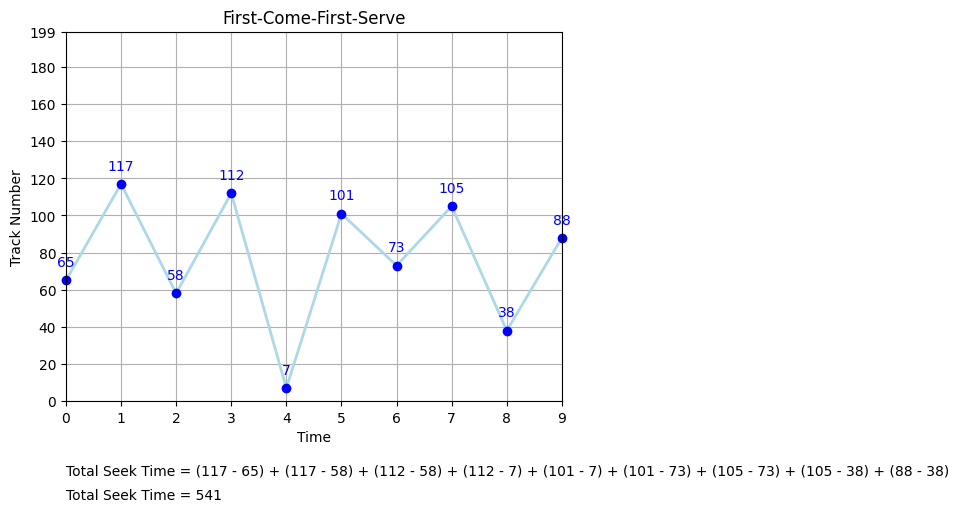

In [36]:
# tracks, track_bounds = prompt_user() # Uncomment to manually configure

sorted_tracks = fcfs(tracks, track_bounds)
graph_it(sorted_tracks, track_bounds, title="First-Come-First-Serve", print_calcs_to_console=print_calcs_to_console)

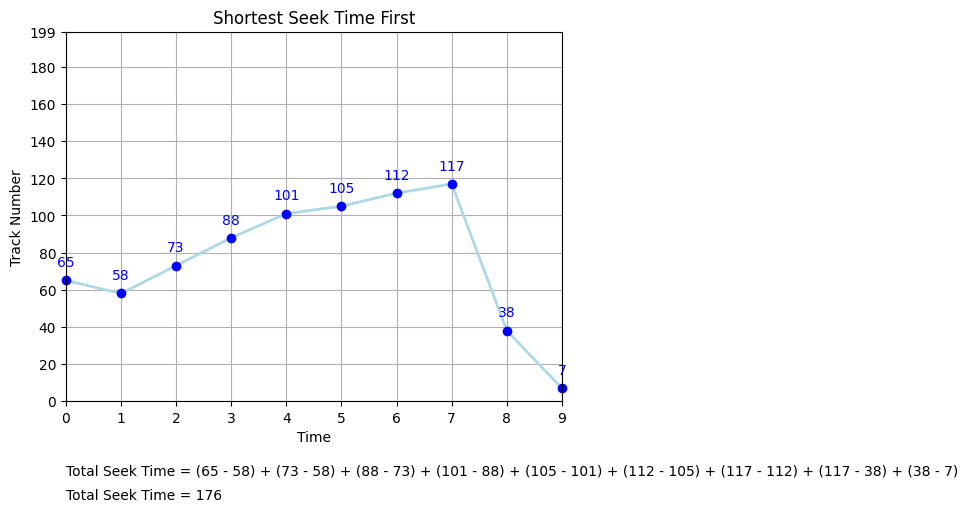

In [37]:
sorted_tracks = sstf(tracks, track_bounds)
graph_it(sorted_tracks, track_bounds, title="Shortest Seek Time First", print_calcs_to_console=print_calcs_to_console)

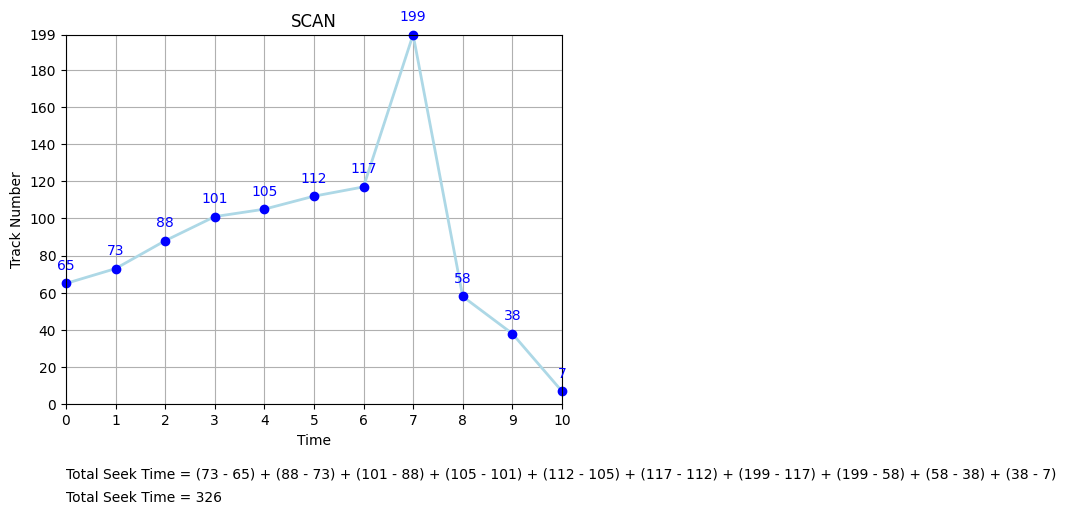

In [38]:
# tracks, track_bounds = prompt_user() # Uncomment to manually configure

sorted_tracks = scan(tracks, track_bounds)
graph_it(sorted_tracks, track_bounds, title="SCAN", print_calcs_to_console=print_calcs_to_console)

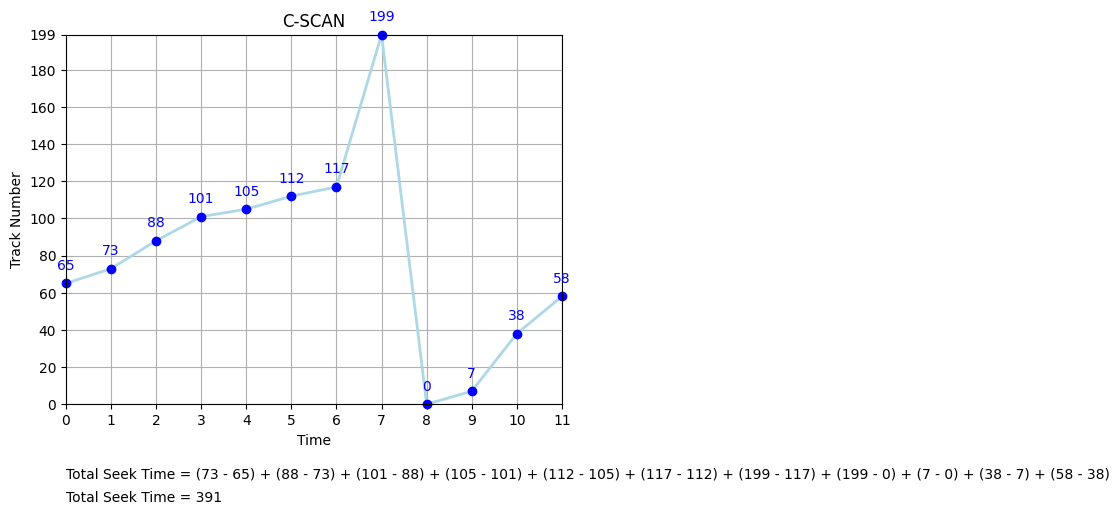

In [39]:
# tracks, track_bounds = prompt_user() # Uncomment to manually configure

sorted_tracks = cscan(tracks, track_bounds)
graph_it(sorted_tracks, track_bounds, title="C-SCAN", print_calcs_to_console=print_calcs_to_console)

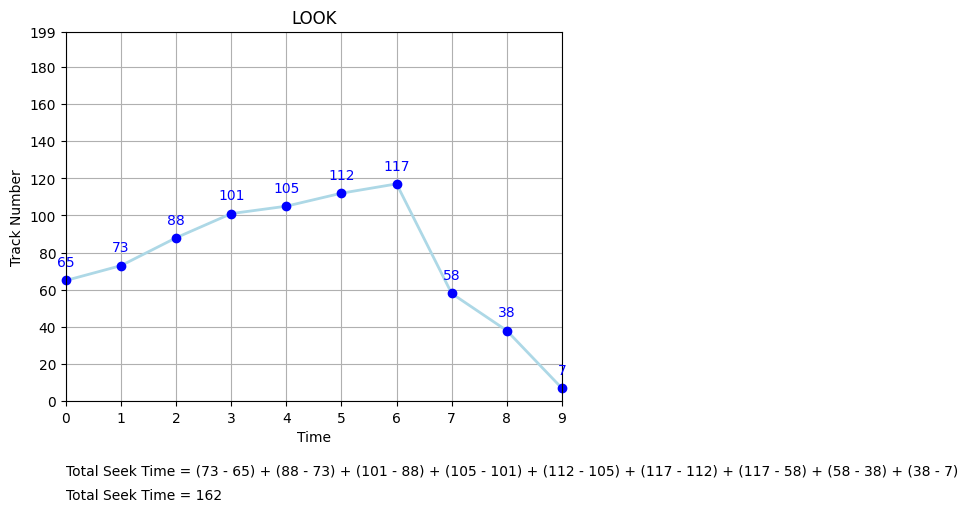

In [40]:
# tracks, track_bounds = prompt_user() # Uncomment to manually configure

sorted_tracks = look(tracks, track_bounds)
graph_it(sorted_tracks, track_bounds, title="LOOK", print_calcs_to_console=print_calcs_to_console)

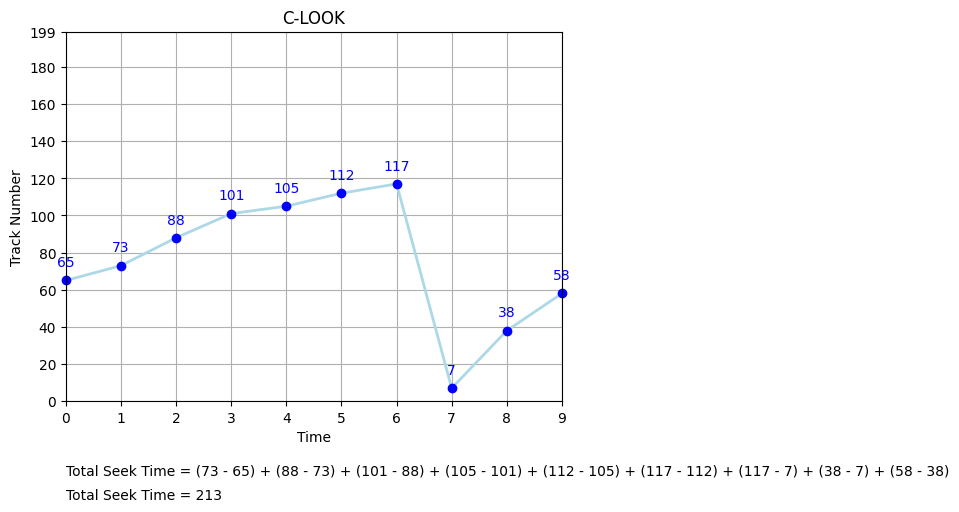

In [41]:
# tracks, track_bounds = prompt_user() # Uncomment to manually configure

sorted_tracks = clook(tracks, track_bounds)
graph_it(sorted_tracks, track_bounds, title="C-LOOK", print_calcs_to_console=print_calcs_to_console)